## **Exercício 3 - de Uso de LSTM**

### **REDES NEURAIS RECORRENTES**

### Profa. Roseli Ap. Francelin Romero

### Alunos:
- Gabriel Bortoli (5378290)
- Lucas Maretti (6789752)

**PROBLEMA**: OBTENHA UMA SERIE TEMPORAL

Escolha uma série temporal do seu interesse, como por exemplo, uma série sobre a variação de preços de produtos ao consumidor, ou uma série sobre a variação do dolar nos ultimos anos. Monte uma base de dados de aproximadamente 1000 registros em formato cvs.

Siga os seguintes passos para realizar este projeto e use o exemplo disponibilizado no Drive da disciplina no diretório Aula3. </br> 

*  Carregar o dataset do CSV file.

Transformar o dataset de modo a adequa-lo para o modelo LSTM, incluindo:
* 1 - Transformar os dados para um problema de aprendizado supervisionado.
* 2 - Transformar os dados para ser "stationary", considerando passo =1, ou seja, timestep =1.
* 3 - Transformar os dados para que fiquem no interv. [-1,1].
* 4 - Ajusta o modelo da rede LSTM para o conj. de treinamento.
Implementar considerando: 5 LSTMs e depois 10 LSTM
* 5 - Avaliar os dois modelos de LSTM estático no conjunto de teste.
* 6 - Visualizar o desempenho da Previsão.

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# converte um array de valores numa matriz de dados 
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
 
# as sementes ajudam a ter resultados reproduzíveis
from numpy.random import seed
seed(42)
from tensorflow.random import set_seed
set_seed(42)

# Carregar o dataset
dataframe = read_csv('climate.csv', engine='python', parse_dates=['date'], dayfirst=True)
# dataframe['date']= pd.to_datetime(dataframe['date'])
# dataset = dataframe.values

In [120]:
# Dataset escolhido: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
# Contém dados climáticos da cidade de Dheli, na Índia.
# Nosso dataset tem, além das informações de dia (indo de 01-Jan-2013 até 24-Apr-2017, totalizando 1575 observações),
# informações de temperatura, umidade, velocidade do vento e pressão.
# Para esse exercício, iremos usar apenas a temperatura média.

print(dataframe.head(3),'\n')

dataset = dataframe['meantemp'].values
dataset = dataset.reshape(len(dataset),1)
print(dataset[:3])

        date   meantemp  humidity  wind_speed  meanpressure
0 2013-01-01  10.000000      84.5    0.000000   1015.666667
1 2013-01-02   7.400000      92.0    2.980000   1017.800000
2 2013-01-03   7.166667      87.0    4.633333   1018.666667 

[[10.        ]
 [ 7.4       ]
 [ 7.16666667]]


In [121]:
# normalizar o dataset
scaler = MinMaxScaler(feature_range=(-1, 1))
dataset = scaler.fit_transform(dataset)
print(dataset[:3])

[[-0.75545852]
 [-0.91441048]
 [-0.9286754 ]]


In [122]:
# dividir em conjuntos de train and test 
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(train[:3],'\n')
print(test[:3])

[[-0.75545852]
 [-0.91441048]
 [-0.9286754 ]] 

[[-0.22816594]
 [-0.32751092]
 [-0.23580786]]


In [123]:
# reshape em X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print(trainX[:3], '\n\n', trainY[:3],'\n')
print(testX[:3], '\n\n', testY[:3])

[[-0.75545852]
 [-0.91441048]
 [-0.9286754 ]] 

 [-0.91441048 -0.9286754  -0.83697234] 

[[-0.22816594]
 [-0.32751092]
 [-0.23580786]] 

 [-0.32751092 -0.23580786 -0.18231441]


In [124]:
# reshape entrada na forma [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(trainX[:3], '\n\n', testX[:3])

[[[-0.75545852]]

 [[-0.91441048]]

 [[-0.9286754 ]]] 

 [[[-0.22816594]]

 [[-0.32751092]]

 [[-0.23580786]]]


In [125]:
# criando e fazendo o fit da rede LSTM
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.summary()

Epoch 1/100
1053/1053 - 2s - loss: 0.0736 - 2s/epoch - 2ms/step
Epoch 2/100
1053/1053 - 1s - loss: 0.0108 - 1s/epoch - 957us/step
Epoch 3/100
1053/1053 - 1s - loss: 0.0107 - 998ms/epoch - 948us/step
Epoch 4/100
1053/1053 - 1s - loss: 0.0105 - 995ms/epoch - 945us/step
Epoch 5/100
1053/1053 - 1s - loss: 0.0106 - 1s/epoch - 985us/step
Epoch 6/100
1053/1053 - 1s - loss: 0.0105 - 1s/epoch - 971us/step
Epoch 7/100
1053/1053 - 1s - loss: 0.0106 - 993ms/epoch - 943us/step
Epoch 8/100
1053/1053 - 1s - loss: 0.0105 - 987ms/epoch - 937us/step
Epoch 9/100
1053/1053 - 1s - loss: 0.0107 - 1s/epoch - 968us/step
Epoch 10/100
1053/1053 - 1s - loss: 0.0106 - 1s/epoch - 1ms/step
Epoch 11/100
1053/1053 - 1s - loss: 0.0105 - 1s/epoch - 984us/step
Epoch 12/100
1053/1053 - 1s - loss: 0.0105 - 995ms/epoch - 944us/step
Epoch 13/100
1053/1053 - 1s - loss: 0.0105 - 1s/epoch - 1ms/step
Epoch 14/100
1053/1053 - 1s - loss: 0.0105 - 1s/epoch - 1ms/step
Epoch 15/100
1053/1053 - 1s - loss: 0.0105 - 1s/epoch - 1ms/step

In [126]:
# fazer as predicoes
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

17/17 [==============================] - 0s 1ms/step


In [127]:
# inverter antes as predicoes
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calcular o RMSE error root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.66 RMSE
Test Score: 1.60 RMSE


In [128]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

print(trainPredictPlot[0:3],'\n')
print(testPredictPlot[0:3],'\n')

[[        nan]
 [10.64262581]
 [ 8.73211575]] 

[[nan]
 [nan]
 [nan]] 



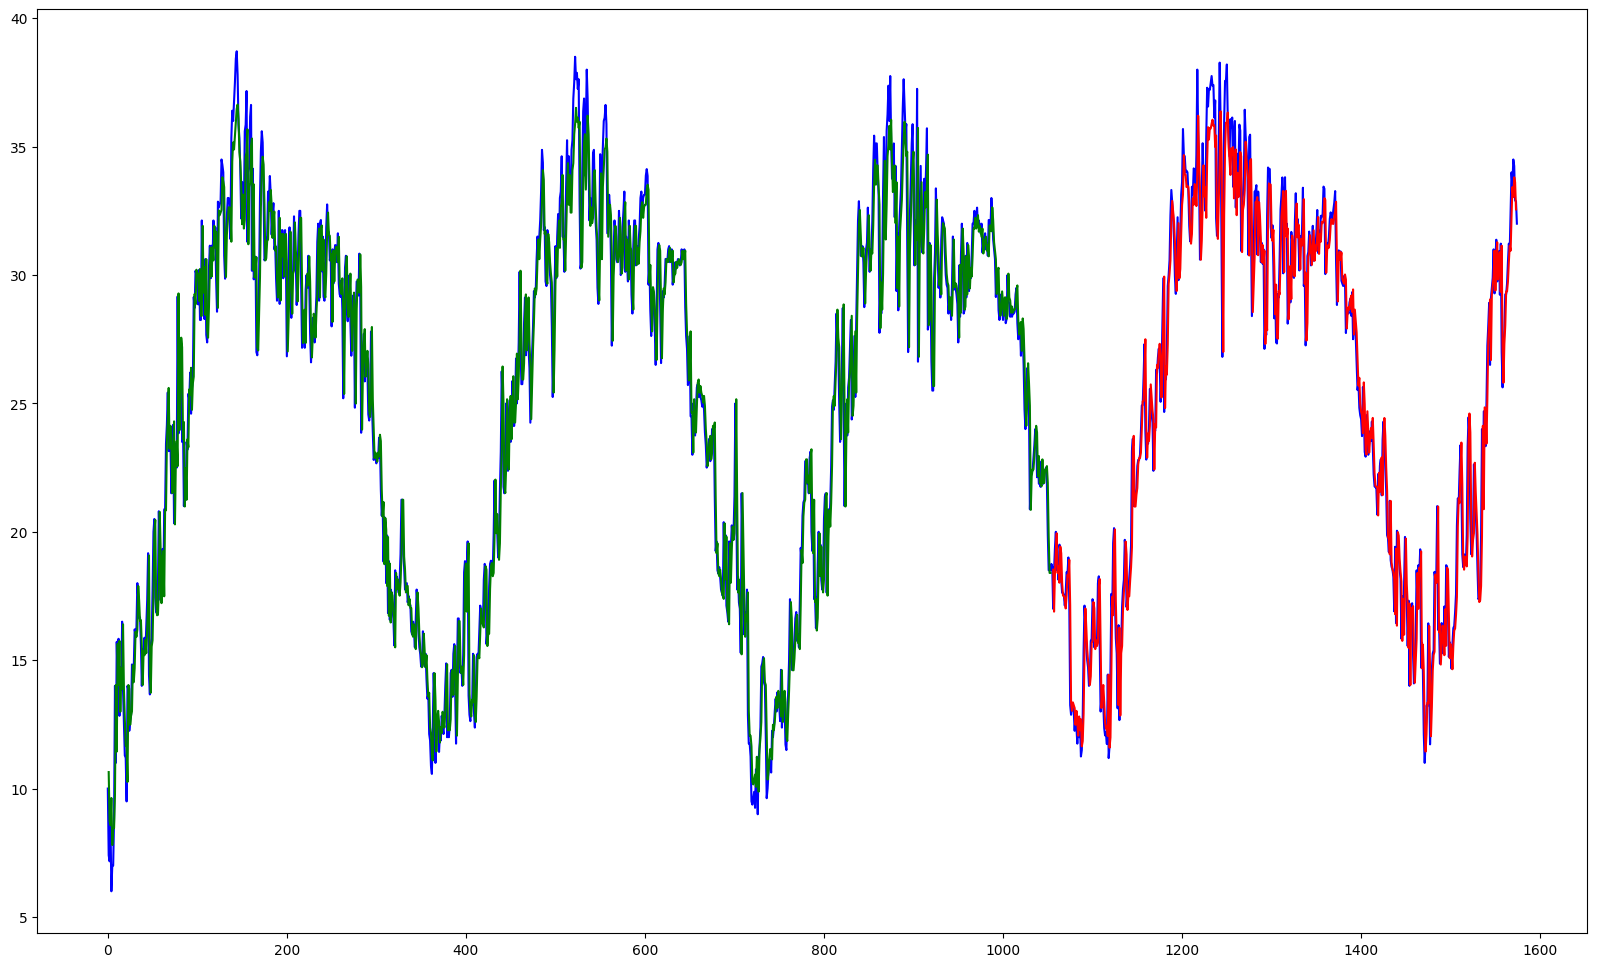

In [129]:
# plot baseline and predictions
plt.figure(figsize=[20,12])
plt.plot(scaler.inverse_transform(dataset), color="blue")
plt.plot(trainPredictPlot, color="green")
plt.plot(testPredictPlot, color="red")
plt.show()

In [130]:
# Modelo alterado para a LSTM com 10 camadas

dataset2 = dataframe['meantemp'].values
dataset2 = dataset2.reshape(len(dataset2),1)

# normalizar o dataset
scaler2 = MinMaxScaler(feature_range=(-1, 1))
dataset2 = scaler2.fit_transform(dataset2)

# dividir em conjuntos de train and test 
train_size2 = int(len(dataset2) * 0.67)
test_size2 = len(dataset2) - train_size2
train2, test2 = dataset2[0:train_size2,:], dataset2[train_size2:len(dataset2),:]

# reshape em X=t and Y=t+1
look_back2 = 1
trainX2, trainY2 = create_dataset(train2, look_back2)
testX2, testY2 = create_dataset(test2, look_back2)

# reshape entrada na forma [samples, time steps, features]
trainX2 = np.reshape(trainX2, (trainX2.shape[0], 1, trainX2.shape[1]))
testX2 = np.reshape(testX2, (testX2.shape[0], 1, testX2.shape[1]))

# criando e fazendo o fit da rede LSTM
model2 = Sequential()
model2.add(LSTM(10, input_shape=(1, look_back2)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(trainX2, trainY2, epochs=100, batch_size=1)
model2.summary()

# fazer as predicoes
trainPredict2 = model2.predict(trainX2)
testPredict2 = model2.predict(testX2)

# inverter antes as predicoes
trainPredict2 = scaler2.inverse_transform(trainPredict2)
trainY2 = scaler2.inverse_transform([trainY2])
testPredict2 = scaler2.inverse_transform(testPredict2)
testY2 = scaler2.inverse_transform([testY2])

# calcular o RMSE error root mean squared error
trainScore2 = math.sqrt(mean_squared_error(trainY2[0], trainPredict2[:,0]))
print('Train Score: %.2f RMSE' % (trainScore2))
testScore2 = math.sqrt(mean_squared_error(testY2[0], testPredict2[:,0]))
print('Test Score: %.2f RMSE' % (testScore2))

# shift train predictions for plotting
trainPredictPlot2 = np.empty_like(dataset2)
trainPredictPlot2[:, :] = np.nan
trainPredictPlot2[look_back2:len(trainPredict2)+look_back2, :] = trainPredict2

# shift test predictions for plotting
testPredictPlot2 = np.empty_like(dataset2)
testPredictPlot2[:, :] = np.nan
testPredictPlot2[len(trainPredict2)+(look_back2*2)+1:len(dataset2)-1, :] = testPredict2

Epoch 1/100
1053/1053 [==============================] - 3s 1ms/step - loss: 0.0575
Epoch 2/100
1053/1053 [==============================] - 1s 1ms/step - loss: 0.0108
Epoch 3/100
1053/1053 [==============================] - 1s 1ms/step - loss: 0.0106
Epoch 4/100
1053/1053 [==============================] - 1s 1ms/step - loss: 0.0104
Epoch 5/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.0105
Epoch 6/100
1053/1053 [==============================] - 1s 1ms/step - loss: 0.0104
Epoch 7/100
1053/1053 [==============================] - 1s 1ms/step - loss: 0.0105
Epoch 8/100
1053/1053 [==============================] - 1s 1ms/step - loss: 0.0105
Epoch 9/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.0106
Epoch 10/100
1053/1053 [==============================] - 3s 2ms/step - loss: 0.0105
Epoch 11/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.0105
Epoch 12/100
1053/1053 [==============================] - 2s 2ms/step - lo

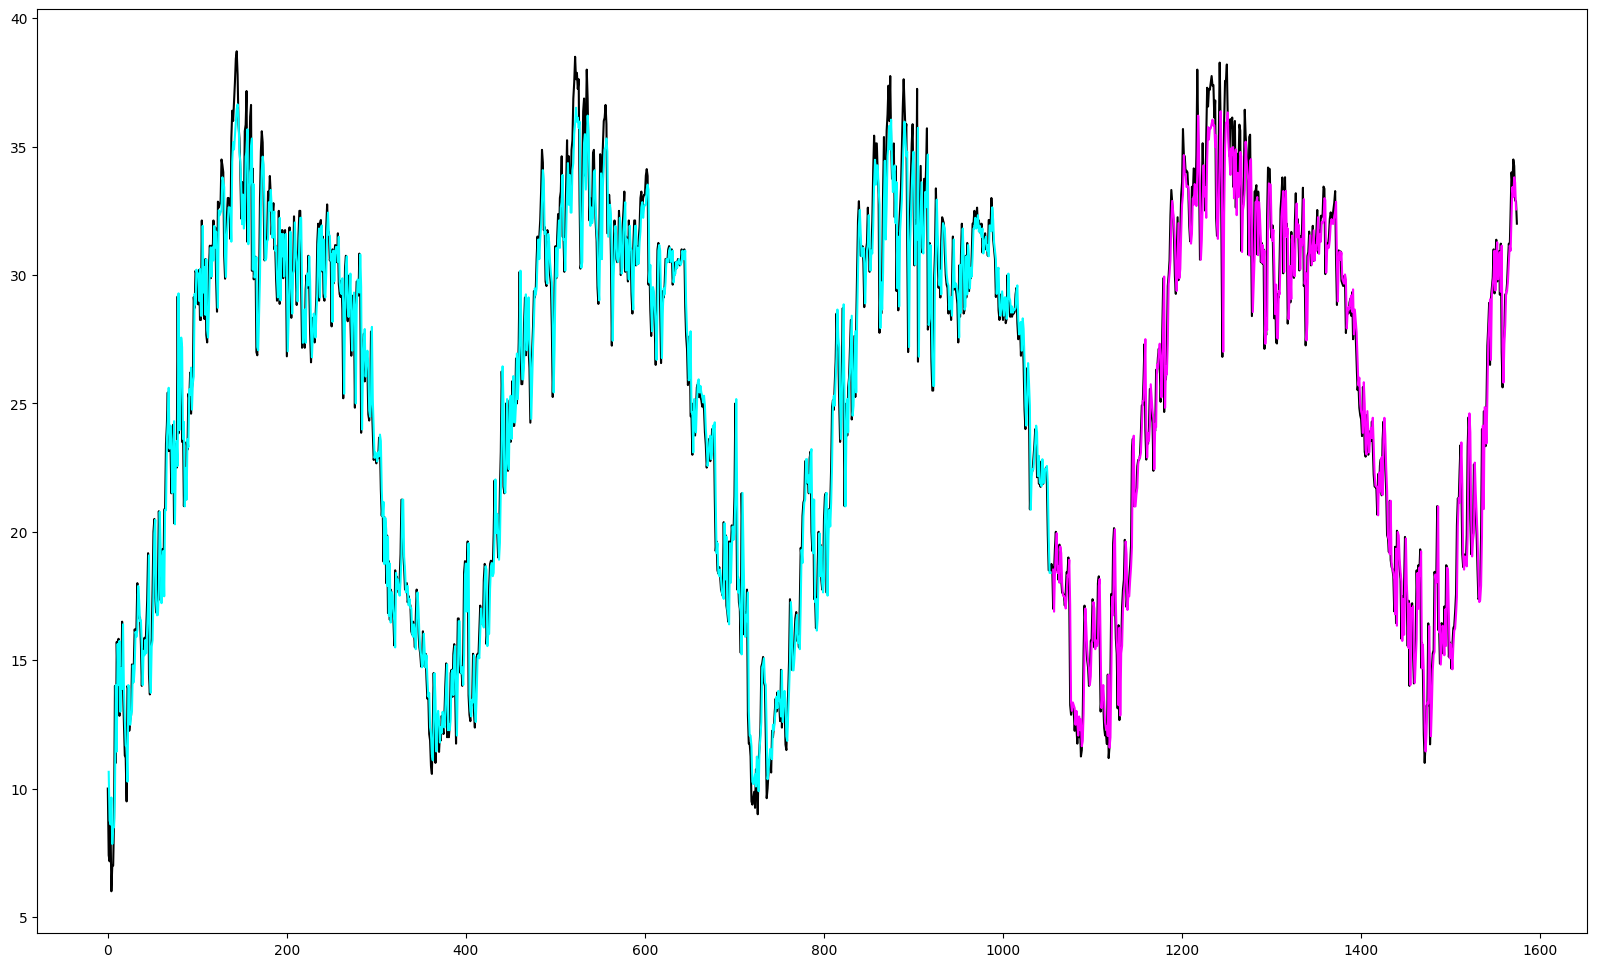

In [131]:
# plot baseline and predictions
plt.figure(figsize=[20,12])
plt.plot(scaler2.inverse_transform(dataset2), color="black")
plt.plot(trainPredictPlot2, color="cyan")
plt.plot(testPredictPlot2, color="magenta")
plt.show()